## A look at each workflow's final MSMs

-----------
#### Plots for big-picture look for each dataset and model pipeline
- Cluster (state) centers on tica landscape
- MSM implied timescales for selecting model on bottom

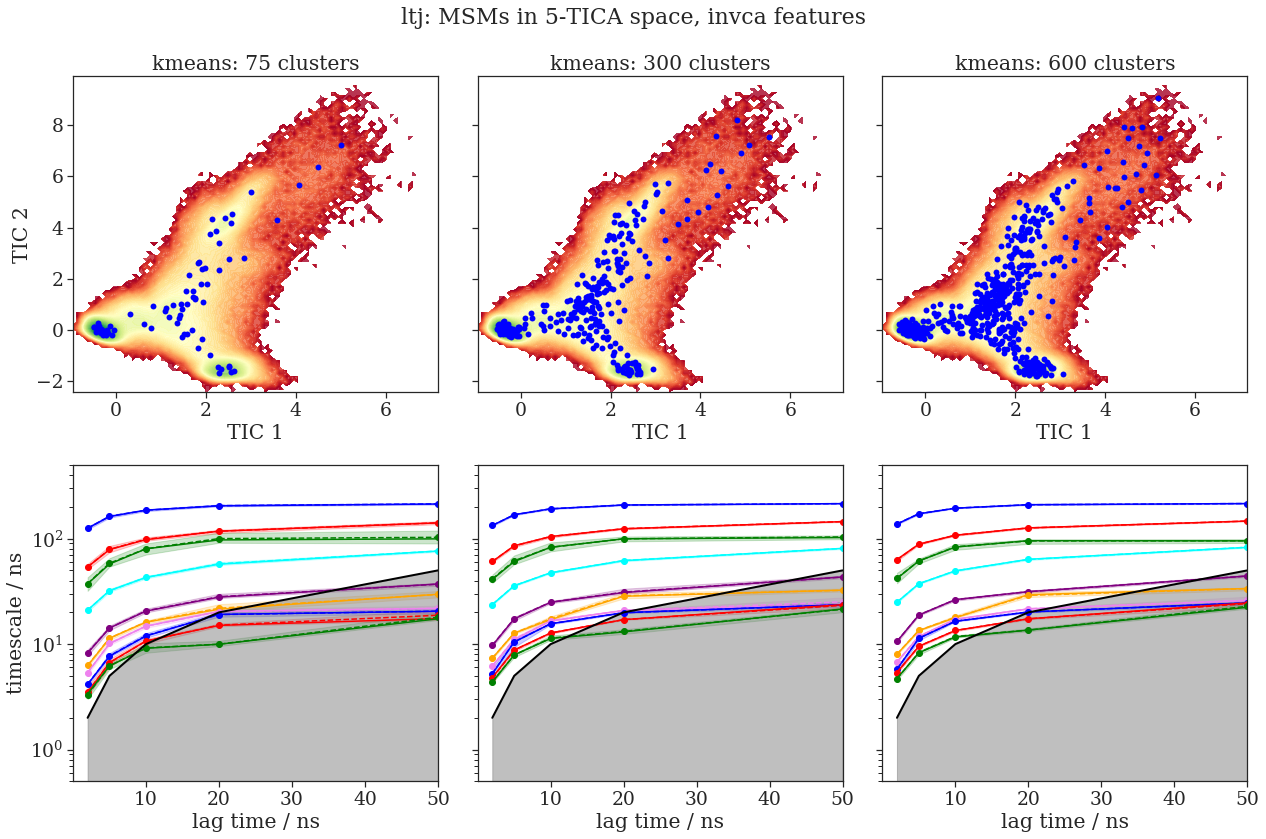

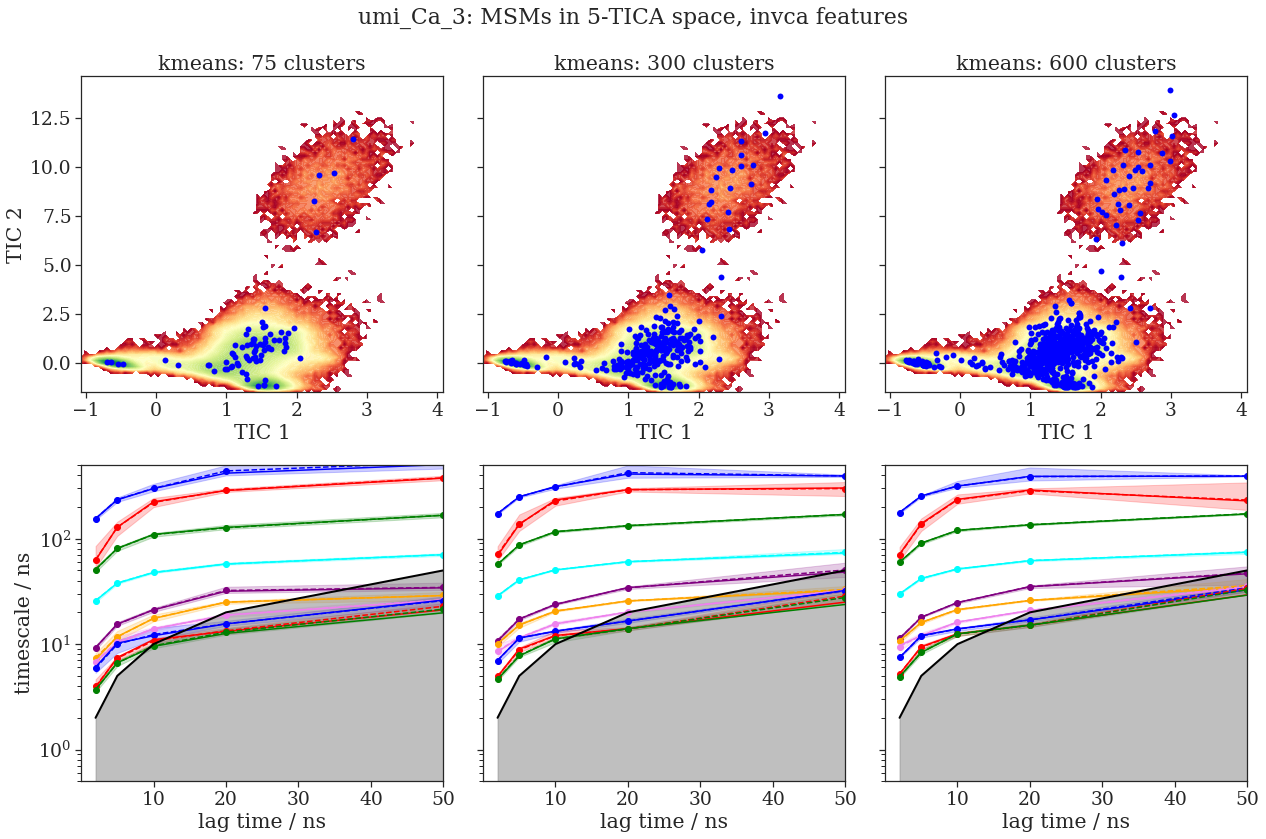

In [78]:
for feat,nm,dataset in aswa_tools.iter_models(all_models):
    
    try:
        tica_inp=np.array(np.concatenate(aswa_tools.get_matching_input(
            dataset["tica"], key="lag", val=chosen_tica_lag).get_output(list(range(2)))
        ))
    except AttributeError:
        continue
    
    for clust_method, setups in dataset["its"].items():
        
        n_configs = len(setups)

        if not n_configs: continue

        fig, axes = plt.subplots(2, n_configs,
            figsize=(6*n_configs, 12), sharey="row")

        for i,setup in enumerate(setups):
            
            clustercenters = aswa_tools.get_matching_input(
                dataset["cluster_%s"%clust_method],
                key=setup["par"][0],
                val=setup["par"][1]
            ).clustercenters
            
            pyemma.plots.plot_free_energy( 
            #pyemma.plots.plot_density(
                *tica_inp.T,
                cbar=False,
                alpha=0.8,
                ax=axes[0][i],
                logscale=True,
                cmap="RdYlGn_r",
            )
            
            seaborn.scatterplot(
                x=clustercenters[:,0],
                y=clustercenters[:,1],
                s=35,
                ax=axes[0][i],
                legend=False,
                color="blue",
                linewidth=0,
            )
            plot_title = "%s: %d clusters" % (
                clust_method, clustercenters.shape[0])
        
            if "regspace" in clust_method:
                plot_title += ", %0.2f dmin"%setup["par"][1]

            axes[0][i].set_title(plot_title)
            axes[0][i].set_xlabel("TIC 1")
            axes[1][i].set_ylim([0.5,500])
    
            if i == 0:
                axes[0][i].set_ylabel("TIC 2")
        
            pyemma.plots.plot_implied_timescales(
                pyemma.load(setup["result"])
                if isinstance(setup["result"], (str,Path))
                else setup["result"],
                ax=axes[1][i],
                units='ns', dt=0.02,
            )
            
            if i > 0:
                axes[1][i].yaxis.label.set_visible(False)
                #axes[2,i].yaxis.label.set_visible(False)
        
            #break  # to run faster while prototyping

        plt.suptitle(
            "%s: MSMs in %d-TICA space, %s features"%(
                nm, n_tica_dim, feat), fontsize=22,
        )
        fig.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig("analyses/%s/msm/its_%s-%s-TICA01landscapewithCC.png"%(
            nm, clust_method, feat), dpi=300)

-----------------

AttributeError: 'ImpliedTimescales' object has no attribute 'eigenvectors_right'

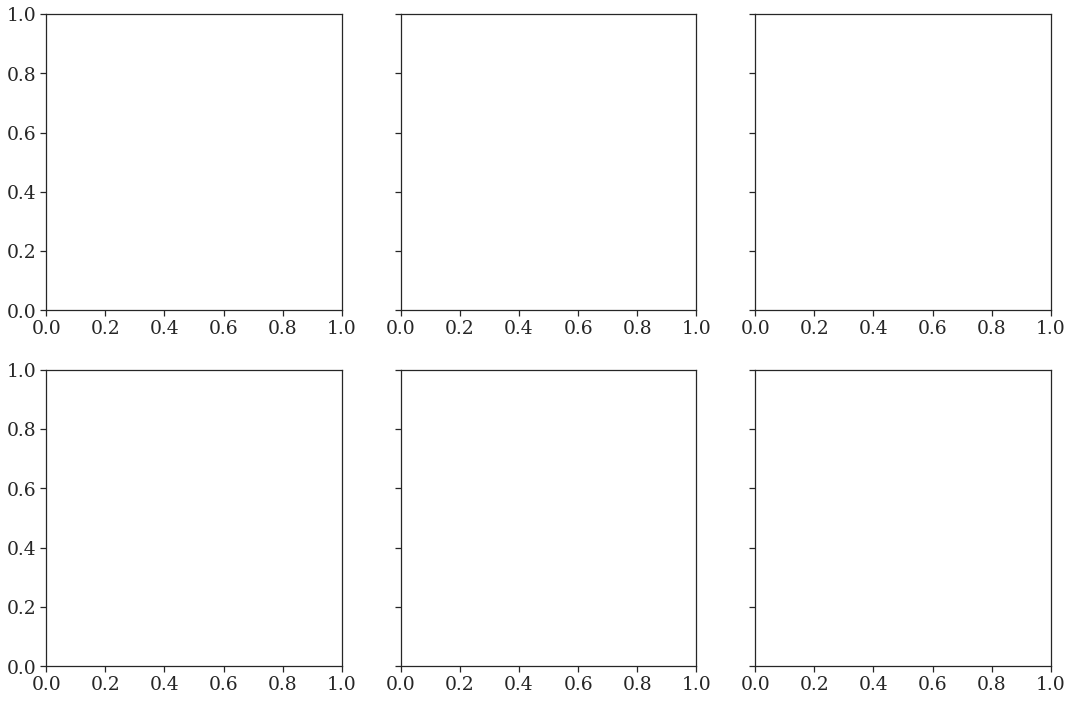

In [79]:
placement = [
# Clockwise w/ lower middle as ITS plot
# there are luckily 5 lags/models per ITS
[1,0], [0,0], [0,1], [0,2], [1,2],
]

for feat,nm,dataset in aswa_tools.iter_models(all_models):
    
    try:
        tica_inp = np.array(np.concatenate(
            aswa_tools.get_matching_input(
                dataset["tica"],
                key="lag", val=chosen_tica_lag).get_output(list(range(2)))
        ))
    except AttributeError:
        continue
    
    for clust_method, setups in dataset["its"].items():
        
        n_configs = len(setups)
        
        if not n_configs: continue
        
        fig, axes = plt.subplots(2, n_configs,
            figsize=(6*n_configs, 12), sharey="row")

        for i,setup in enumerate(setups):
            
            eigvec  = setup["result"].eigenvectors_right()
            
            cluster = aswa_tools.get_matching_input(
                dataset["cluster_%s"%clust_method],
                key=setup["par"][0],
                val=setup["par"][1]
            )
            
            pyemma.plots.plot_contour(
                *tica_inp.T,
                eigvec[cluster.dtrajs[0], i + 1],
                ax=axes[0][m],
                cmap='PiYG',
                #cbar_label='{}. right eigenvector'.format(i + 2),
                mask=True,
            )

 #           _, _, misc = pyemma.plots.plot_state_map(
  #              *tica_inp.T,
   #             eigvec = msm.eigenvectors_right(),
    #            ax=axes[0][m],
     #           cbar=True if m+1 == len(
      #              setup["result"].models) else False,
       #     )
        #    
         #   pyemma.plots.plot_free_energy( 
        #    #pyemma.plots.plot_density(
       #         *tica_inp.T,
      #          cbar=False,
     #           alpha=0.8,
    #            ax=axes[0][i],
   #             logscale=True,
  #              cmap="RdYlGn_r",
 #           )
            
            seaborn.scatterplot(
                x=cluster.clustercenters[:,0],
                y=cluster.clustercenters[:,1],
                s=35,
                ax=axes[0][i],
                legend=False,
                color="blue",
                linewidth=0,
            )
            plot_title = "%s: %d clusters" % (
                clust_method, cluster.clustercenters.shape[0])
        
            if "regspace" in clust_method:
                plot_title += ", %0.2f dmin"%setup["par"][1]

            axes[0][i].set_title(plot_title)
            axes[0][i].set_xlabel("TIC 1")
            axes[1][i].set_ylim([0.5,500])
    
            if i == 0:
                axes[0][i].set_ylabel("TIC 2")
        
            pyemma.plots.plot_implied_timescales(
                pyemma.load(setup["result"])
                if isinstance(setup["result"], (str,Path))
                else setup["result"],
                ax=axes[1][i],
                units='ns', dt=0.02,
            )
            
            if i > 0:
                axes[1][i].yaxis.label.set_visible(False)
                #axes[2,i].yaxis.label.set_visible(False)
        
            #break  # to run faster while prototyping

        plt.suptitle(
            "%s: MSMs in %d-TICA space, %s features"%(
                nm, n_tica_dim, feat), fontsize=22,
        )
        fig.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig("analyses/%s/msm/its_%s-%s-MSMprocesswithCC.png"%(
            nm, clust_method, feat), dpi=600)

-----------------

-----------------

-----------------

-----------------

-----------------

-----------------

-----------------

-----------------